In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from scipy import linalg
df = pd.read_csv('/content/automobile.csv')

In [42]:
df.head(10)
df.describe()

,Price,Age,Odometer
count,6019.000000,6019.000000,6.019000e+03
mean,9.479468,6.641801,5.873838e+04
std,11.187917,3.269742,9.126884e+04
min,0.440000,1.000000,1.710000e+02
25%,3.500000,4.000000,3.400000e+04
50%,5.640000,6.000000,5.300000e+04
75%,9.950000,9.000000,7.300000e+04
max,160.000000,22.000000,6.500000e+06


<ipython-input-43-9735dbd834fb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


<Axes: xlabel='Price', ylabel='Density'>

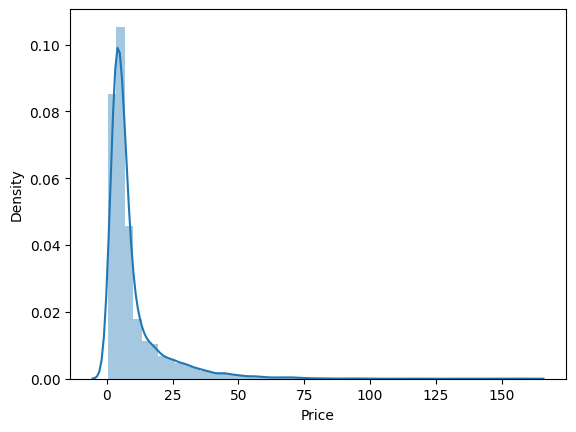

In [43]:
import seaborn as sns
sns.distplot(df.Price)

<ipython-input-44-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

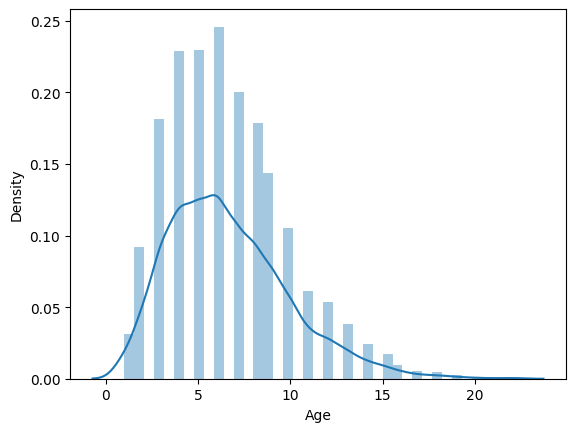

In [44]:
sns.distplot(df['Age'])

<ipython-input-47-70ffd6c2afb9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Odometer'])


<Axes: xlabel='Odometer', ylabel='Density'>

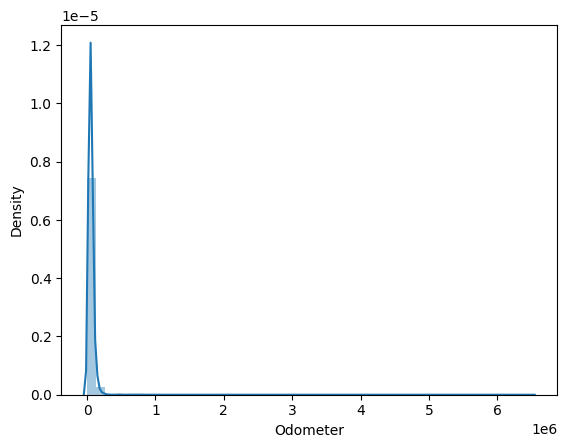

In [47]:
sns.distplot(df['Odometer'])

<Axes: xlabel='Age', ylabel='Price'>

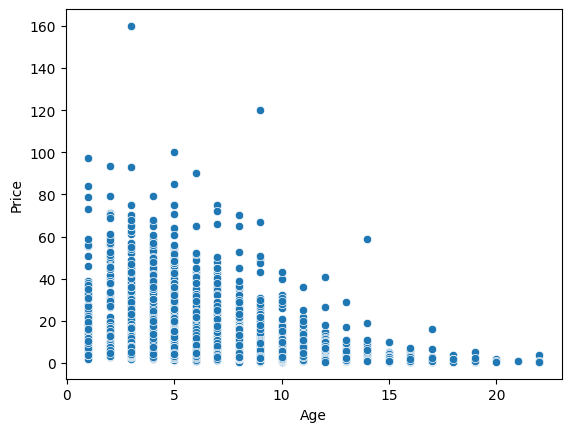

In [45]:
sns.scatterplot(x=df['Age'],y=df['Price'])

In [46]:
df.Make.value_counts()
df.columns
df['mileage'] = pd.to_numeric(df.Mileage.replace('+AC0-1',None))
set(df.mileage)

{6.4,
 7.5,
 7.81,
 7.94,
 8.0,
 8.5,
 9.0,
 9.5,
 9.52,
 10.0,
 10.5,
 10.8,
 10.91,
 11.0,
 11.25,
 11.33,
 11.36,
 11.5,
 11.72,
 12.0,
 12.19,
 12.38,
 12.39,
 12.5,
 12.7,
 12.86,
 12.97,
 13.0,
 13.14,
 13.17,
 13.22,
 13.44,
 13.5,
 14.0,
 14.16,
 14.36,
 14.39,
 14.42,
 14.47,
 14.66,
 14.67,
 14.69,
 14.75,
 14.84,
 14.94,
 15.0,
 15.11,
 15.17,
 15.2,
 15.41,
 15.42,
 15.5,
 15.64,
 15.72,
 15.97,
 16.0,
 16.25,
 16.36,
 16.38,
 16.47,
 16.5,
 16.78,
 16.8,
 17.0,
 17.11,
 17.16,
 17.19,
 17.32,
 17.44,
 17.5,
 17.67,
 17.72,
 17.88,
 17.92,
 17.97,
 18.0,
 18.16,
 18.19,
 18.2,
 18.25,
 18.33,
 18.42,
 18.44,
 18.5,
 18.53,
 18.69,
 18.78,
 18.86,
 18.88,
 19.0,
 19.08,
 19.33,
 19.5,
 19.64,
 19.67,
 19.72,
 19.83,
 19.98,
 20.0,
 20.14,
 20.36,
 20.45,
 20.5,
 20.51,
 20.54,
 20.58,
 20.64,
 20.7,
 20.73,
 20.77,
 20.86,
 20.89,
 20.92,
 21.0,
 21.03,
 21.1,
 21.14,
 21.2,
 21.5,
 21.56,
 21.64,
 21.7,
 21.72,
 21.76,
 22.0,
 22.3,
 22.48,
 22.5,
 22.7,
 22.95,
 23.0,
 23.

In [48]:
df['engineCC'] = pd.to_numeric(df.EngineCC.replace('+AC0-1',None))
set(df.engineCC)

{72.0,
 624.0,
 793.0,
 796.0,
 799.0,
 814.0,
 936.0,
 970.0,
 993.0,
 995.0,
 998.0,
 999.0,
 1014.45,
 1047.0,
 1061.0,
 1077.42,
 1086.0,
 1120.0,
 1150.0,
 1172.0,
 1186.0,
 1193.0,
 1194.0,
 1196.0,
 1197.0,
 1198.0,
 1199.0,
 1240.47,
 1242.0,
 1248.0,
 1272.33,
 1298.0,
 1299.0,
 1341.0,
 1343.0,
 1364.0,
 1368.0,
 1373.0,
 1374.44,
 1388.0,
 1390.0,
 1395.0,
 1396.0,
 1399.0,
 1405.0,
 1422.0,
 1461.0,
 1462.0,
 1468.0,
 1489.0,
 1493.0,
 1494.72,
 1495.0,
 1496.0,
 1497.0,
 1498.0,
 1499.0,
 1582.0,
 1586.0,
 1590.0,
 1591.0,
 1595.0,
 1596.0,
 1597.0,
 1598.0,
 1599.0,
 1781.0,
 1794.0,
 1796.0,
 1797.0,
 1798.0,
 1799.0,
 1896.0,
 1948.0,
 1950.0,
 1956.0,
 1968.0,
 1969.0,
 1978.0,
 1984.0,
 1985.0,
 1991.0,
 1995.0,
 1997.0,
 1998.0,
 1999.0,
 2092.0,
 2112.0,
 2143.0,
 2147.0,
 2148.0,
 2149.0,
 2179.0,
 2198.0,
 2199.0,
 2200.0,
 2216.69,
 2349.0,
 2354.0,
 2359.0,
 2359.43,
 2360.0,
 2362.0,
 2393.0,
 2400.0,
 2446.0,
 2477.0,
 2487.0,
 2489.0,
 2494.0,
 2495.0,
 2496.

In [49]:
df['powerBhp']=pd.to_numeric(df.PowerBhp.replace('+AC0-1',None))
set(df.powerBhp)

{34.2,
 35.0,
 35.5,
 37.0,
 37.48,
 37.5,
 38.4,
 40.3,
 41.0,
 46.3,
 47.0,
 47.3,
 48.21,
 52.8,
 53.0,
 53.3,
 53.5,
 53.64,
 55.0,
 55.2,
 55.23,
 56.3,
 57.5,
 57.6,
 58.16,
 58.2,
 58.33,
 60.0,
 61.0,
 62.0,
 62.1,
 62.28,
 63.0,
 63.05,
 63.1,
 64.08,
 65.3,
 66.7,
 67.04,
 67.05,
 68.05,
 68.61,
 69.01,
 70.02,
 71.01,
 138.08,
 139.01,
 139.07,
 142.0,
 144.0,
 147.5,
 148.31,
 152.88,
 153.77,
 157.7,
 157.8,
 158.8,
 161.6,
 162.0,
 163.0,
 163.2,
 163.63,
 167.7,
 168.0,
 168.7,
 169.18,
 174.5,
 174.57,
 175.67,
 178.4,
 180.0,
 181.0,
 181.03,
 181.04,
 181.43,
 185.0,
 193.1,
 198.25,
 199.3,
 201.0,
 nan,
 nan,
 63.12,
 64.0,
 64.1,
 65.0,
 66.0,
 66.03,
 66.1,
 67.0,
 67.06,
 67.1,
 67.68,
 68.0,
 68.1,
 69.0,
 70.0,
 71.0,
 73.0,
 73.74,
 73.75,
 73.8,
 73.9,
 73.94,
 73.97,
 74.0,
 74.27,
 74.9,
 74.93,
 74.96,
 75.0,
 75.94,
 76.0,
 76.8,
 76.9,
 77.0,
 77.88,
 78.0,
 78.08,
 78.9,
 79.4,
 80.0,
 80.46,
 80.9,
 81.8,
 81.83,
 81.86,
 82.0,
 82.4,
 82.5,
 82.85,
 8

In [50]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         6019 non-null   float64
 1   Make          6019 non-null   object 
 2   Location      6019 non-null   object 
 3   Age           6019 non-null   int64  
 4   Odometer      6019 non-null   int64  
 5   FuelType      6019 non-null   object 
 6   Transmission  6019 non-null   object 
 7   OwnerType     6019 non-null   object 
 8   Mileage       6019 non-null   object 
 9   EngineCC      6019 non-null   object 
 10  PowerBhp      6019 non-null   object 
 11  mileage       6010 non-null   float64
 12  engineCC      6016 non-null   float64
 13  powerBhp      6005 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 658.5+ KB


,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,PowerBhp,mileage,engineCC,powerBhp
0,1.75,marutiwagonr,Mumbai,10,72000,CNG,Manual,First,26.6,998,58.16,26.60,998.0,58.16
1,12.50,hyundaicreta,Pune,5,41000,Diesel,Manual,First,19.67,1582,126.2,19.67,1582.0,126.20
2,4.50,hondajazz,Chennai,9,46000,Petrol,Manual,First,18.2,1199,88.7,18.20,1199.0,88.70
3,6.00,marutiertiga,Chennai,8,87000,Diesel,Manual,First,20.77,1248,88.76,20.77,1248.0,88.76
4,17.74,audia4,Coimbatore,7,40670,Diesel,Automatic,Second,15.2,1968,140.8,15.20,1968.0,140.80
5,2.35,hyundaieon,Hyderabad,8,75000,LPG,Manual,First,21.1,814,55.2,21.10,814.0,55.20
6,3.50,nissanmicra,Jaipur,7,86999,Diesel,Manual,First,23.08,1461,63.1,23.08,1461.0,63.10
7,17.50,toyotainnovacrysta,Mumbai,4,36000,Diesel,Automatic,First,11.36,2755,171.5,11.36,2755.0,171.50
8,5.20,volkswagenvento,Pune,7,64430,Diesel,Manual,First,20.54,1598,103.6,20.54,1598.0,103.60
9,1.95,tataindica,Chennai,8,65932,Diesel,Manual,Second,22.3,1248,74,22.30,1248.0,74.00


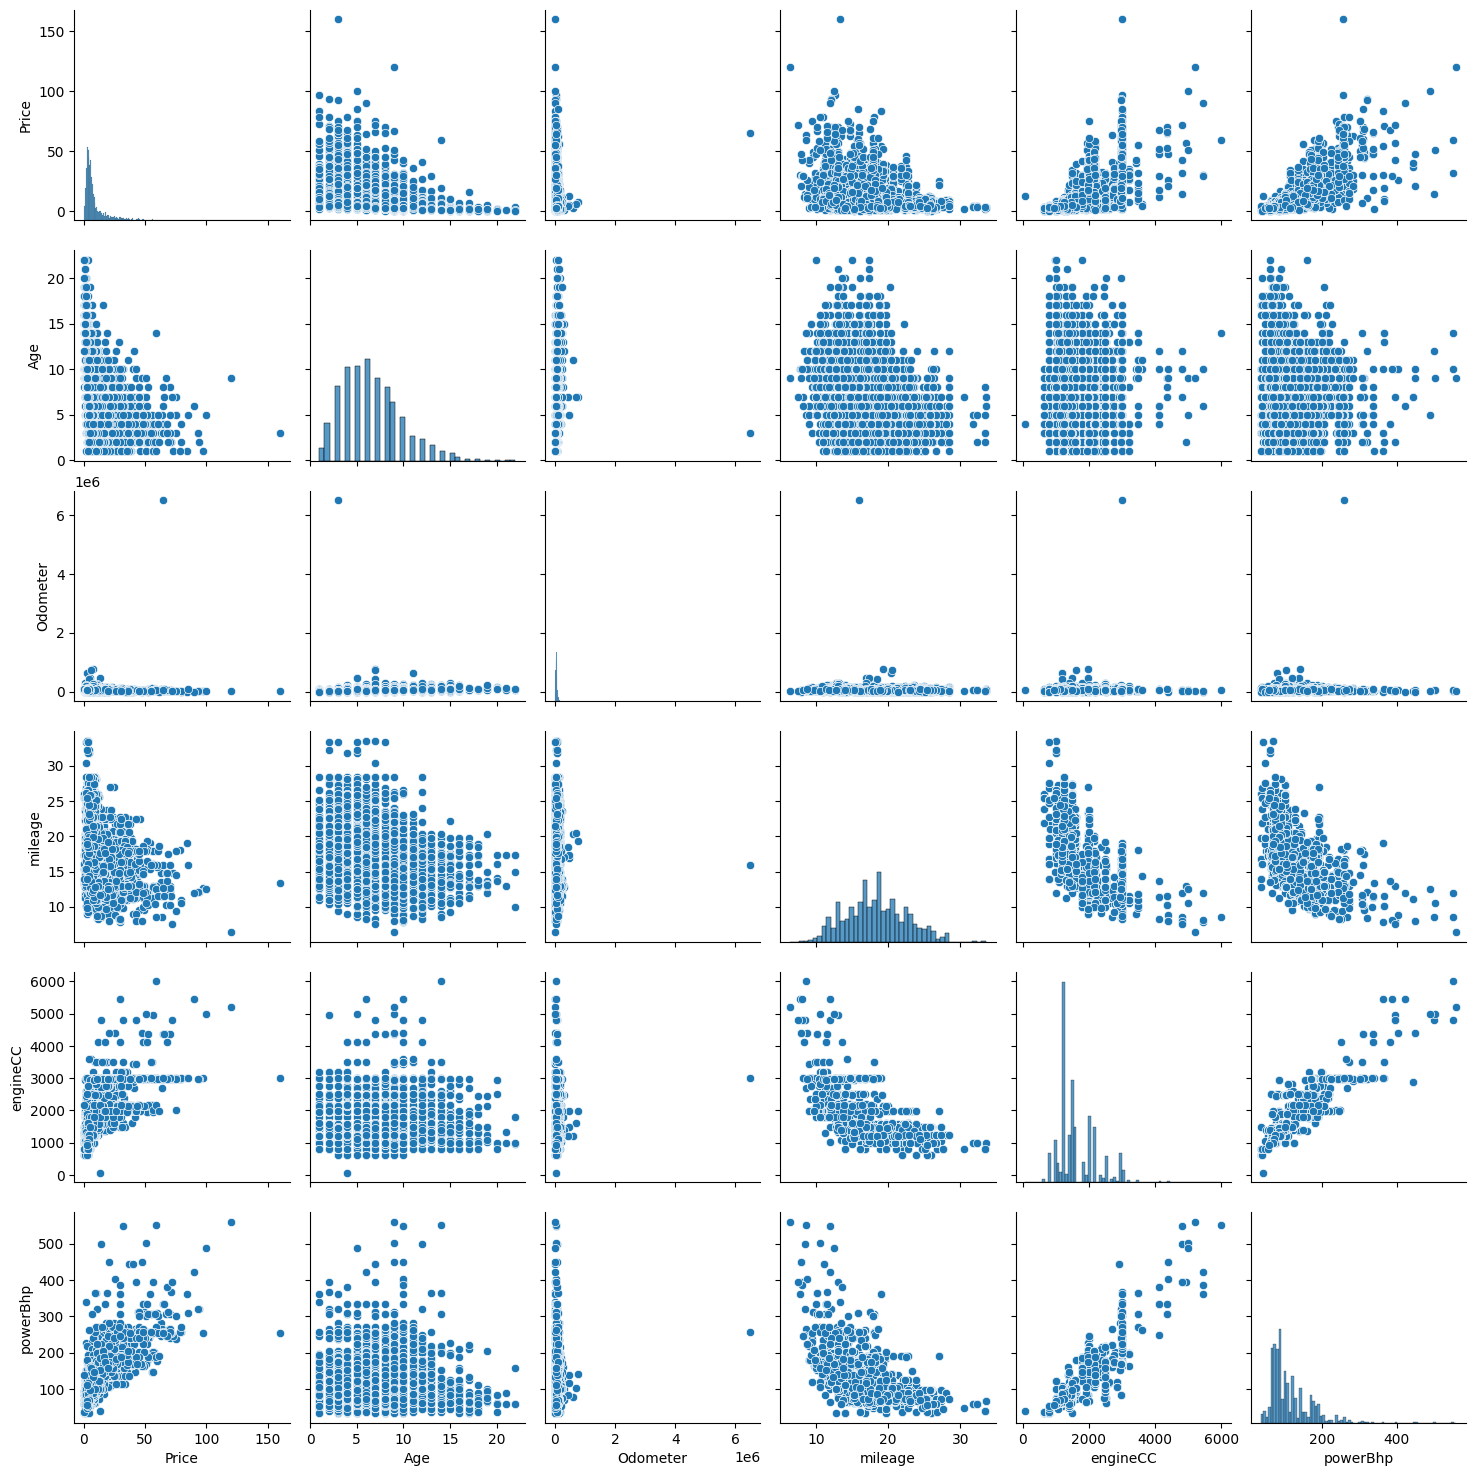

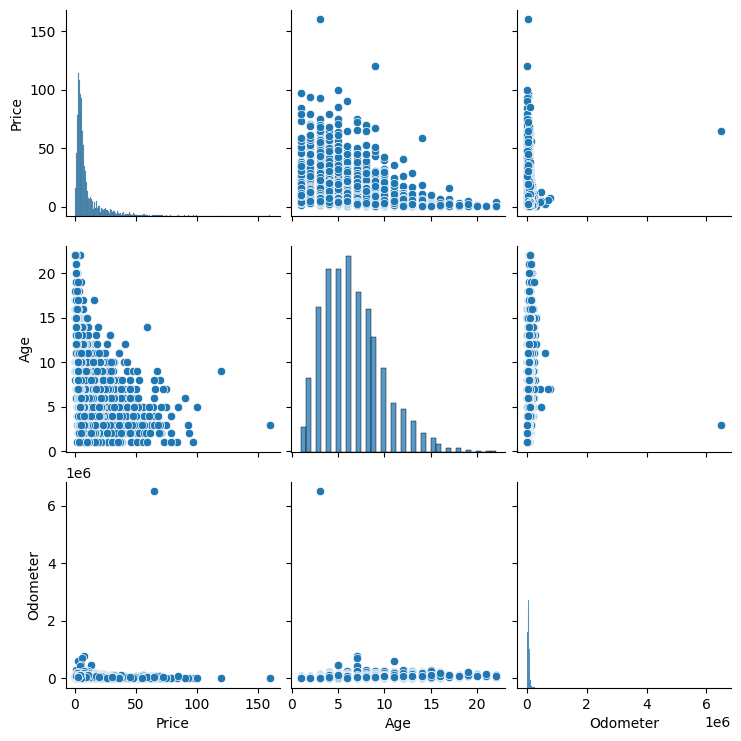

In [51]:
sns.pairplot(df[['Price','Age','Odometer','mileage','engineCC','powerBhp']])
sns.pairplot(df[['Price','Age','Odometer']])

In [52]:
corrl = (df[['Price','Age','Odometer','mileage','engineCC','powerBhp']]).corr()
corrl

,Price,Age,Odometer,mileage,engineCC,powerBhp
Price,1.000000,-0.305327,-0.011493,-0.335088,0.659162,0.772906
Age,-0.305327,1.000000,0.173048,-0.296009,0.050257,-0.030753
Odometer,-0.011493,0.173048,1.000000,-0.065398,0.090625,0.031284
mileage,-0.335088,-0.296009,-0.065398,1.000000,-0.643079,-0.545844
engineCC,0.659162,0.050257,0.090625,-0.643079,1.000000,0.866397
powerBhp,0.772906,-0.030753,0.031284,-0.545844,0.866397,1.000000


In [53]:
corrl.style.background_gradient(cmap='coolwarm')

,Price,Age,Odometer,mileage,engineCC,powerBhp
Price,1.000000,-0.305327,-0.011493,-0.335088,0.659162,0.772906
Age,-0.305327,1.000000,0.173048,-0.296009,0.050257,-0.030753
Odometer,-0.011493,0.173048,1.000000,-0.065398,0.090625,0.031284
mileage,-0.335088,-0.296009,-0.065398,1.000000,-0.643079,-0.545844
engineCC,0.659162,0.050257,0.090625,-0.643079,1.000000,0.866397
powerBhp,0.772906,-0.030753,0.031284,-0.545844,0.866397,1.000000


In [54]:
np.where((df[['Price','Age','Odometer','mileage','engineCC','powerBhp']])
.corr()>0.6,'Yes','No')

array([['Yes', 'No', 'No', 'No', 'Yes', 'Yes'],
       ['No', 'Yes', 'No', 'No', 'No', 'No'],
       ['No', 'No', 'Yes', 'No', 'No', 'No'],
       ['No', 'No', 'No', 'Yes', 'No', 'No'],
       ['Yes', 'No', 'No', 'No', 'Yes', 'Yes'],
       ['Yes', 'No', 'No', 'No', 'Yes', 'Yes']], dtype='<U3')

In [55]:
Location_dummy = pd.get_dummies(df.Location,prefix='Location',drop_first=True)
FuelType_dummy = pd.get_dummies(df.FuelType,prefix='FuelType',drop_first=True)
Transmission_dummy = pd.get_dummies(df.Transmission,prefix='Transmission',drop_first=True)
OwnerType_dummy = pd.get_dummies(df.OwnerType,prefix='OwnerType',drop_first=True)
combine_all_dummy = pd.concat([df,Location_dummy,FuelType_dummy,Transmission_dummy,
OwnerType_dummy],axis=1)
combine_all_dummy.head(5)
combine_all_dummy.columns
clean_df = combine_all_dummy.drop(columns=['Make','Location','FuelType','Transmission',
'OwnerType','Mileage', 'EngineCC', 'PowerBhp'])

In [56]:
clean_df.columns


Index(['Price', 'Age', 'Odometer', 'mileage', 'engineCC', 'powerBhp',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_LPG',
       'FuelType_Petrol', 'Transmission_Manual',
       'OwnerType_Fourth +ACY- Above', 'OwnerType_Second', 'OwnerType_Third'],
      dtype='object')

In [57]:
clean_df.dtypes

,0
Price,float64
Age,int64
Odometer,int64
mileage,float64
engineCC,float64
powerBhp,float64
Location_Bangalore,bool
Location_Chennai,bool
Location_Coimbatore,bool
Location_Delhi,bool


In [58]:
data_train, data_test = train_test_split(clean_df,test_size=0.25,random_state=1234)
data_train.shape,data_test.shape
XTrain = np.array(data_train.iloc[:,0:(clean_df.shape[1]-1)])
YTrain = np.array(data_train['Price'])
XTest = np.array(data_test.iloc[:,0:(clean_df.shape[1]-1)])
YTest = np.array(data_test['Price'])
XTrain.shape, XTest.shape
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [59]:
!pip install shap
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [60]:
data_train, data_test = train_test_split(clean_df,test_size=0.25,random_state=1234)
data_train.shape,data_test.shape
XTrain = np.array(data_train.iloc[:,0:(clean_df.shape[1]-1)])
YTrain = np.array(data_train['Price'])
XTest = np.array(data_test.iloc[:,0:(clean_df.shape[1]-1)])
YTest = np.array(data_test['Price'])
XTrain.shape, XTest.shape

((4514, 23), (1505, 23))

In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
XTrain = imputer.fit_transform(XTrain)
XTest = imputer.transform(XTest)

In [62]:
model = LinearRegression()
model.fit(XTrain, YTrain)
print(model.score(XTrain,YTrain))
print(model.score(XTest,YTest))
explainer = shap.Explainer(model, XTrain)

1.0
1.0


In [63]:
shap_values = explainer(XTest)

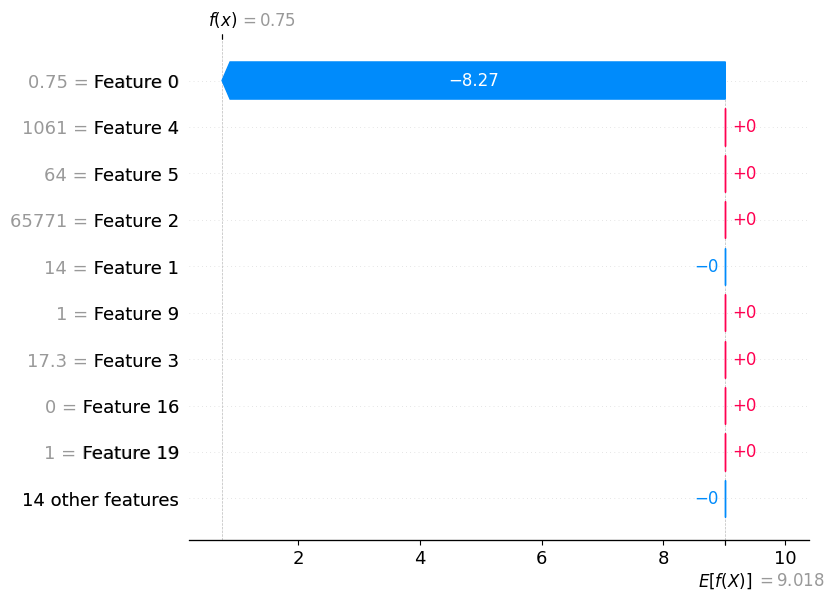

In [64]:
shap.plots.waterfall(shap_values[0])

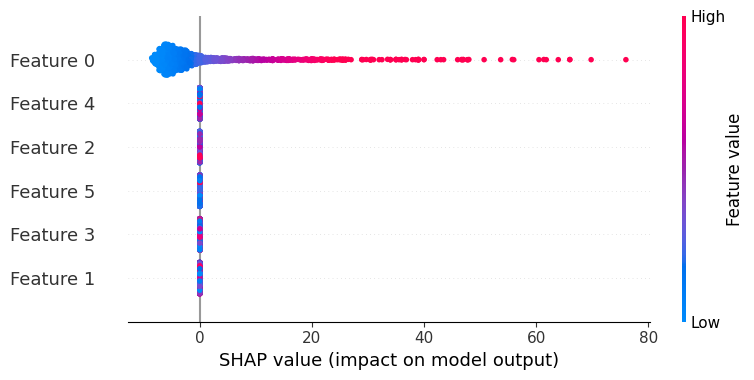

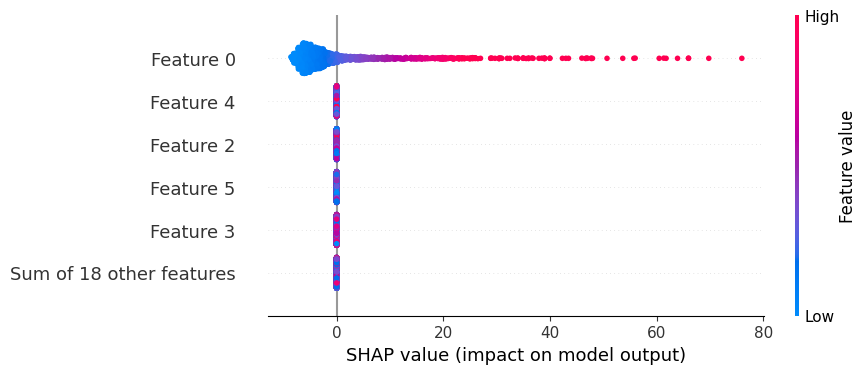

In [65]:
shap.summary_plot(shap_values, XTest,max_display=6)
shap.plots.beeswarm(shap_values, max_display=6)